### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient = pd.read_csv('Patient 380_data.csv')

In [3]:
patient.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,...,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000,8771.000000
mean,0.037084,0.392447,0.830837,1.619675,1.729698,6.322105,1.183949,1.029191,1.013010,1.052824,...,1.989973,1.530389,1.999820,1.888751,0.913689,1.836046,2.072223,1.958405,2.013167,38.338502
std,0.011476,0.020492,0.016385,0.015683,0.060765,3.422234,0.037736,0.003271,0.003758,0.025292,...,0.011577,0.032645,0.013331,0.060340,0.056032,0.023846,0.000622,0.005847,0.019851,14.021624
min,0.002849,0.305962,0.808137,1.598126,1.626795,1.855158,1.131233,1.000210,0.994272,0.998099,...,1.948885,1.409241,1.933348,1.666934,0.638986,1.730110,2.069193,1.941500,1.937131,20.900000
25%,0.029366,0.386889,0.820787,1.609446,1.690464,5.227611,1.161776,1.027637,1.010604,1.033519,...,1.983001,1.512896,1.994091,1.877570,0.875144,1.823873,2.071866,1.954736,2.010835,29.300000
50%,0.034813,0.394266,0.826010,1.612895,1.702424,5.899610,1.174683,1.029612,1.014216,1.062936,...,1.990384,1.534424,2.002219,1.903686,0.910138,1.835665,2.072268,1.957707,2.018800,35.900000
75%,0.040761,0.400490,0.833488,1.625908,1.769165,6.831323,1.194040,1.031371,1.015749,1.070429,...,1.997436,1.551778,2.008452,1.923176,0.944662,1.848817,2.072645,1.961042,2.024686,40.750000
max,0.081036,0.445694,0.882587,1.668111,1.958643,68.399784,1.407596,1.045970,1.020726,1.099146,...,2.021536,1.615823,2.028314,2.055166,1.094120,1.910104,2.074110,1.987410,2.044230,96.900000


In [4]:
X=patient.drop('BIS', axis=1)
y= patient['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

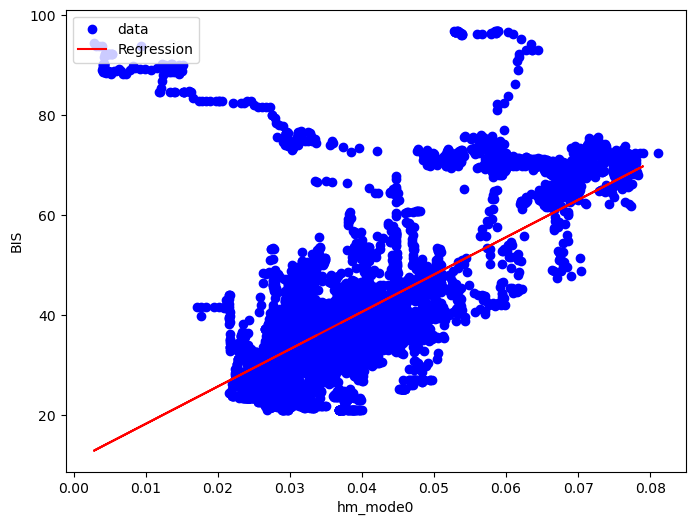

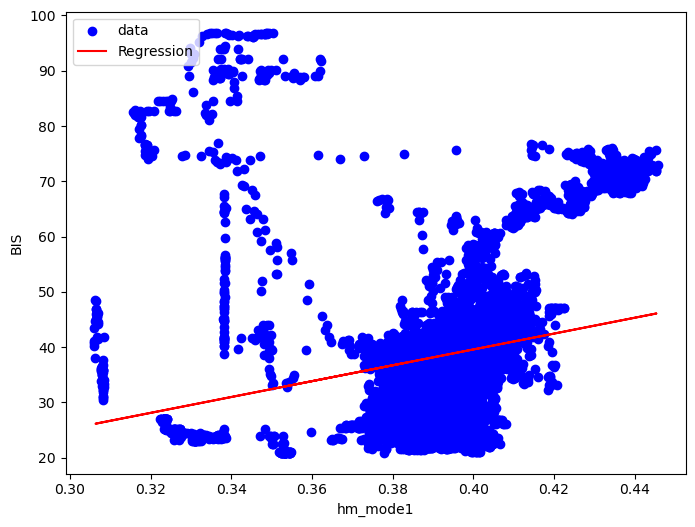

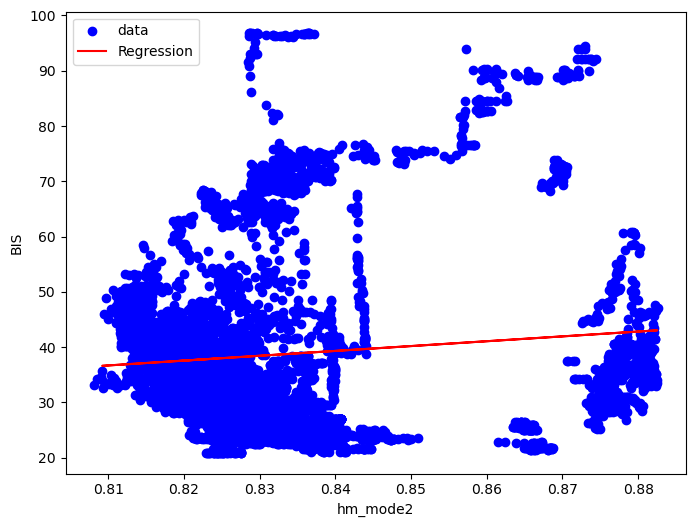

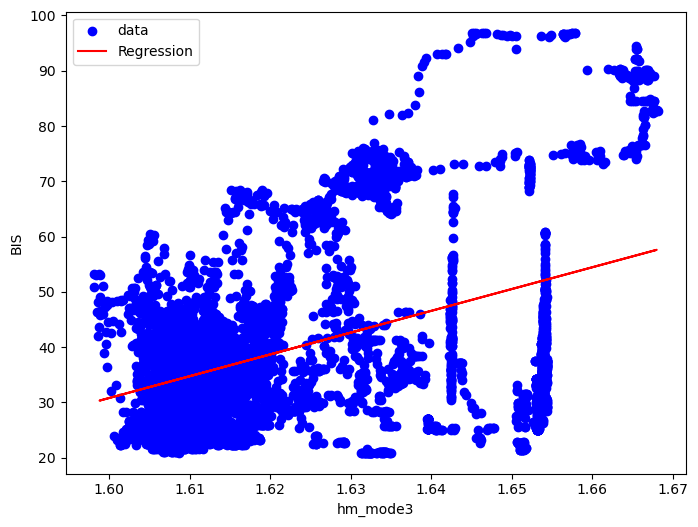

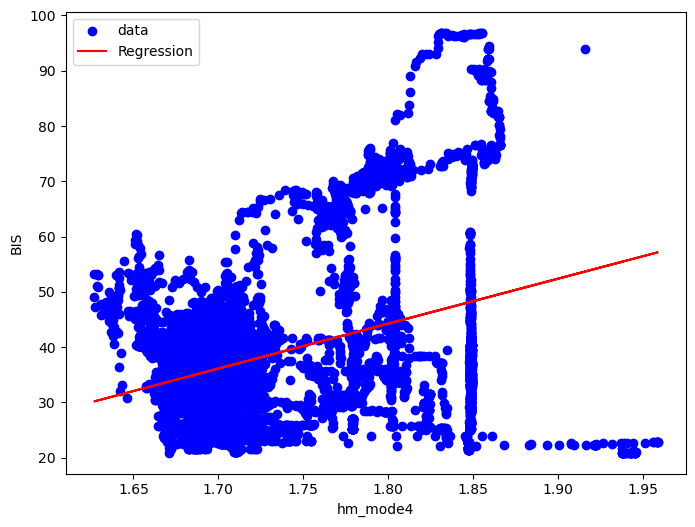

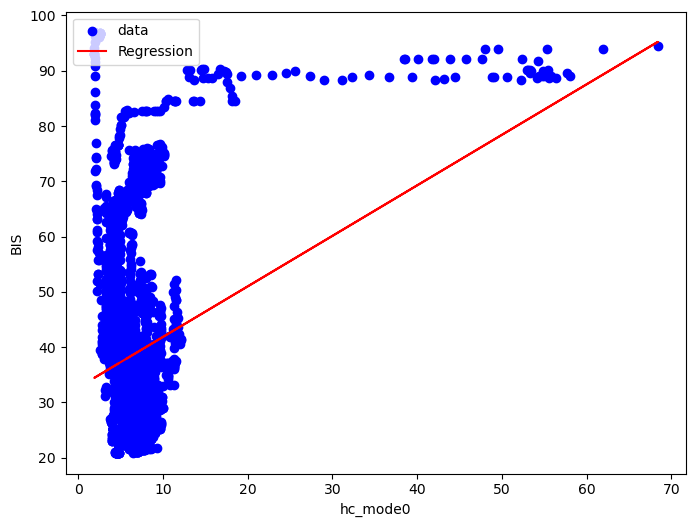

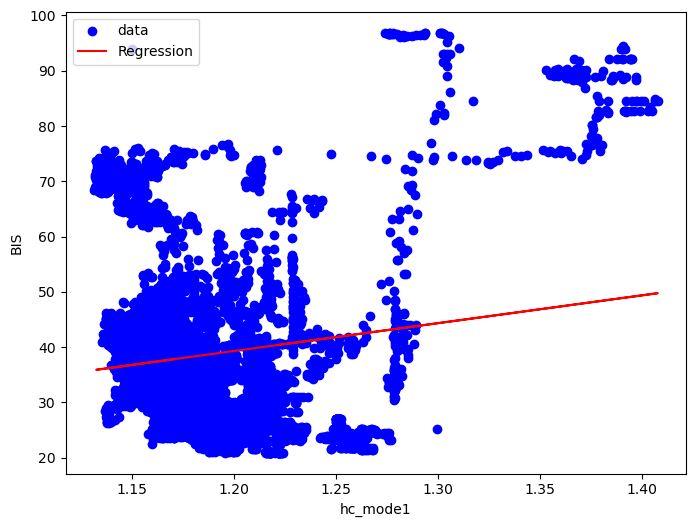

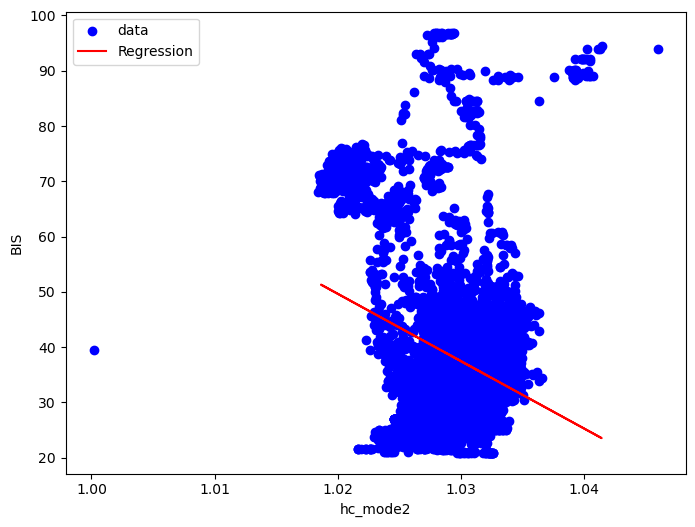

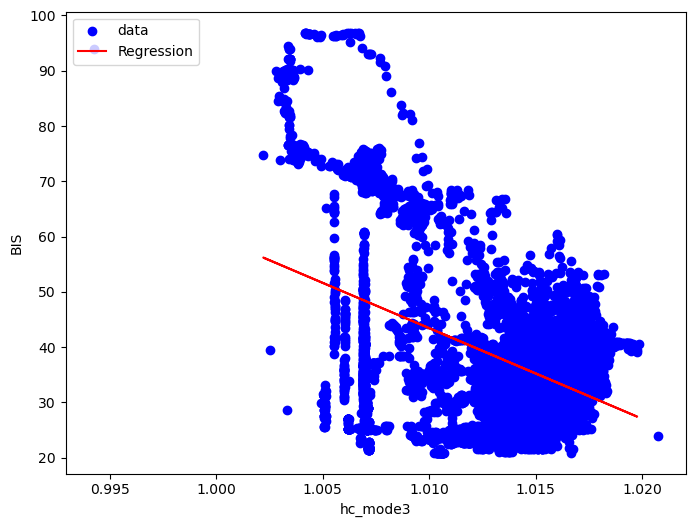

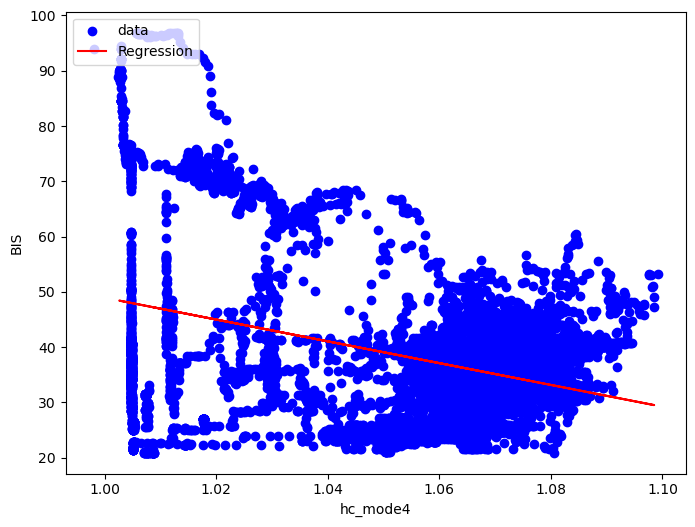

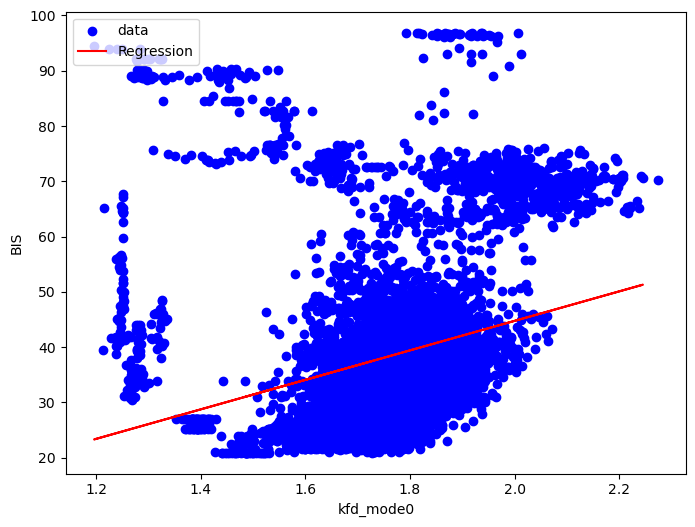

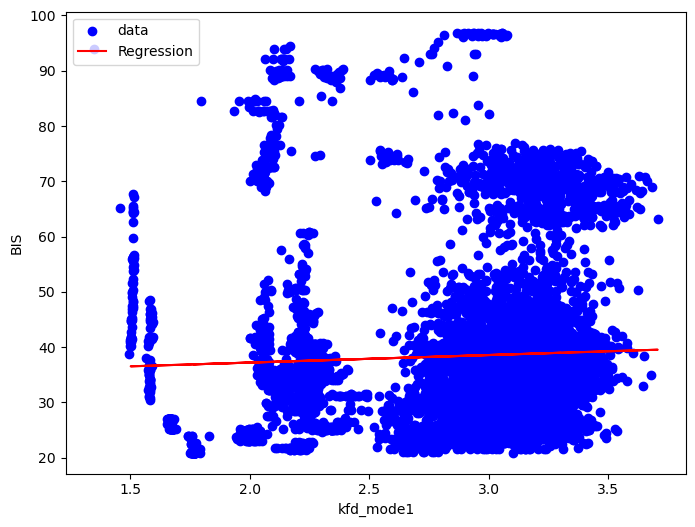

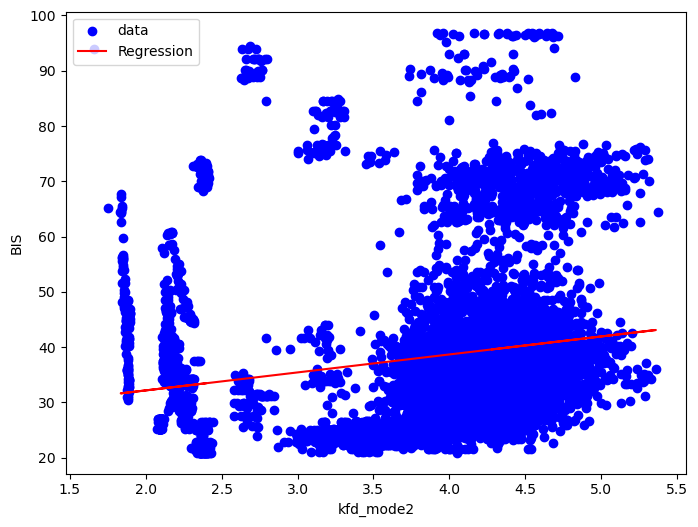

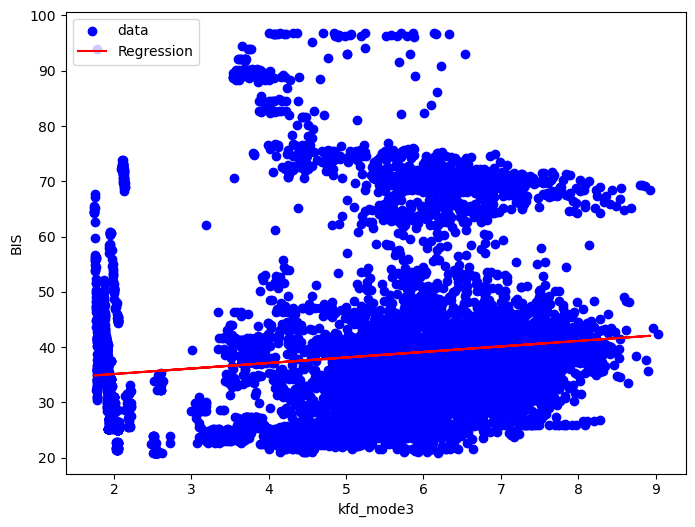

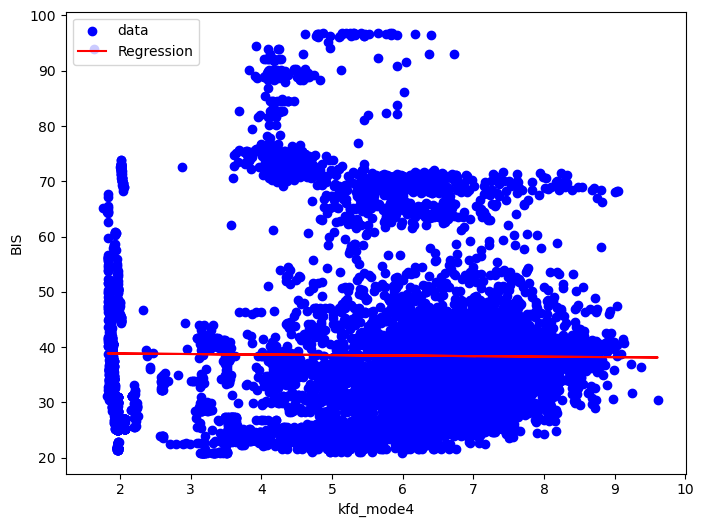

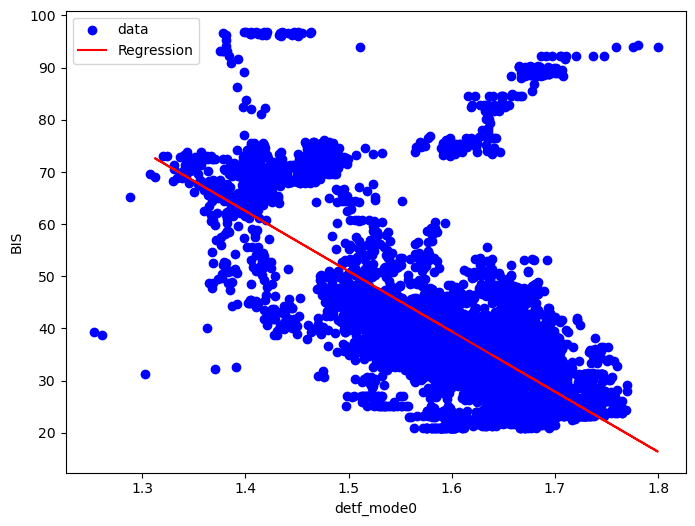

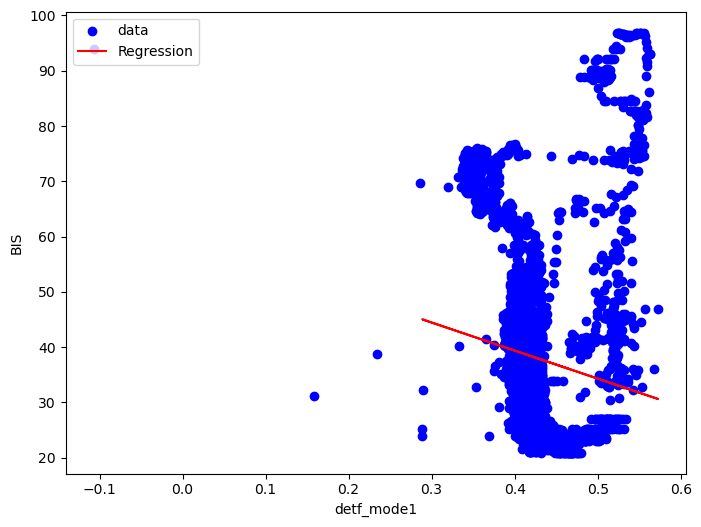

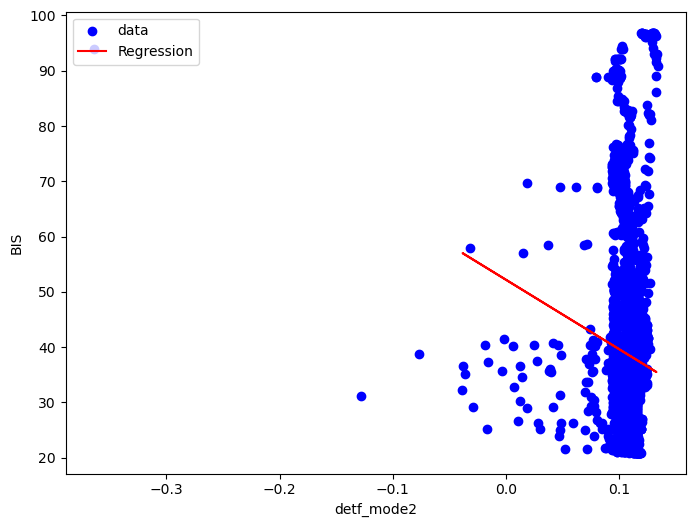

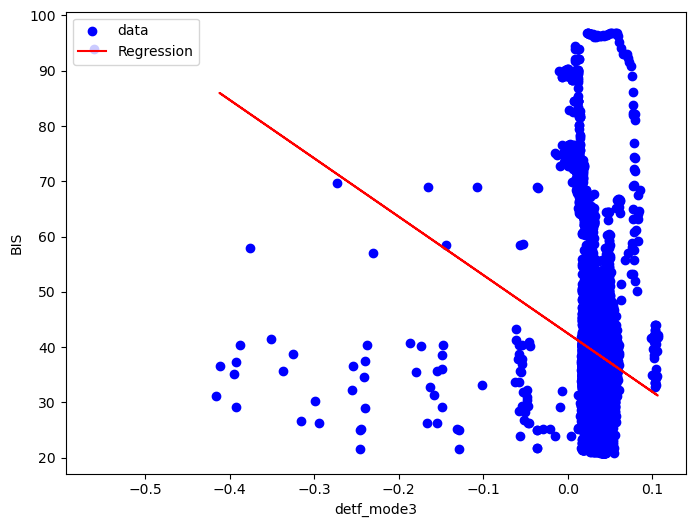

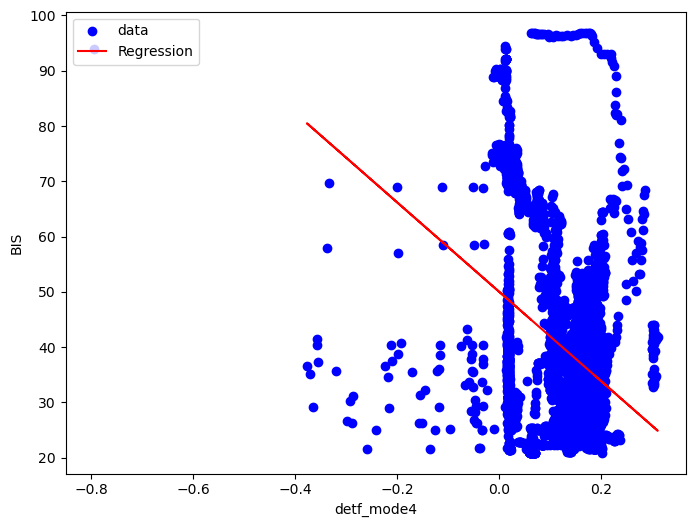

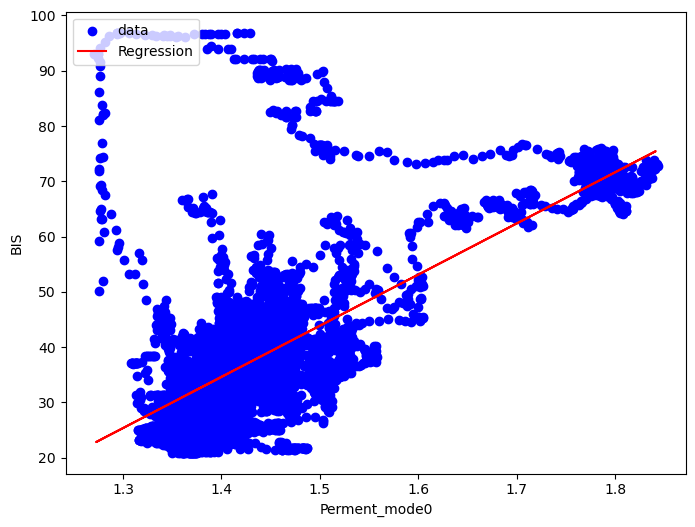

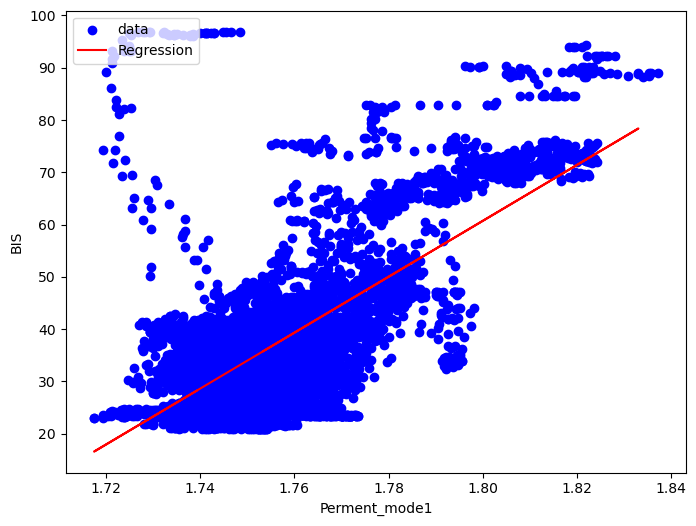

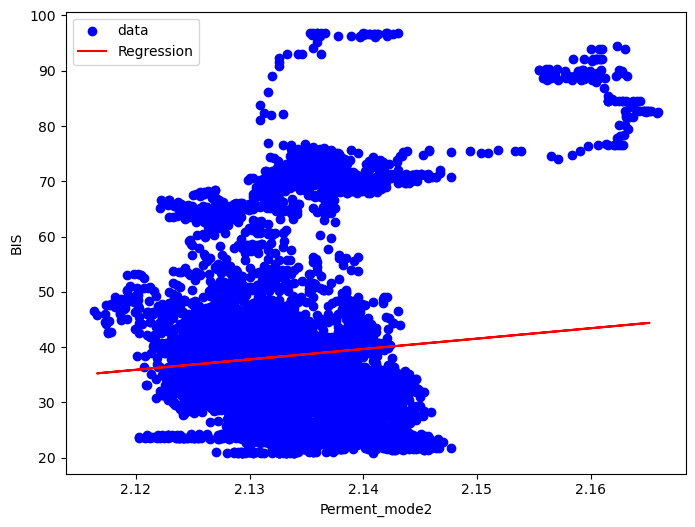

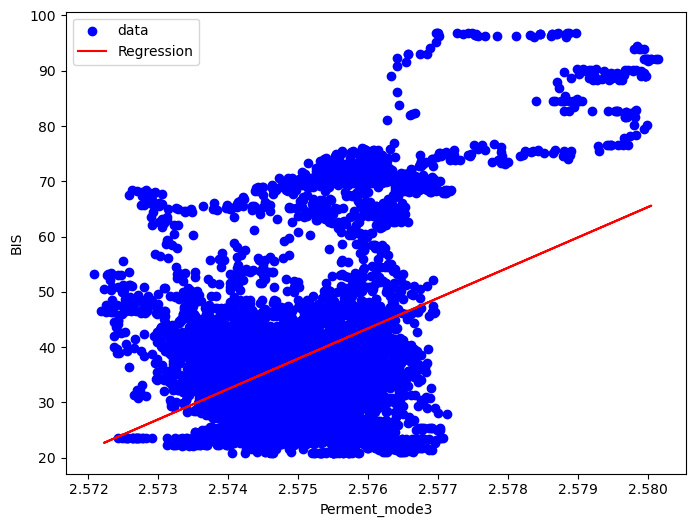

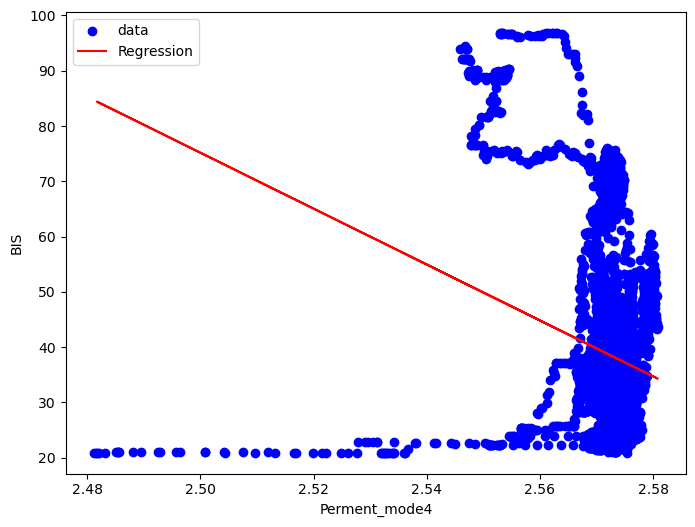

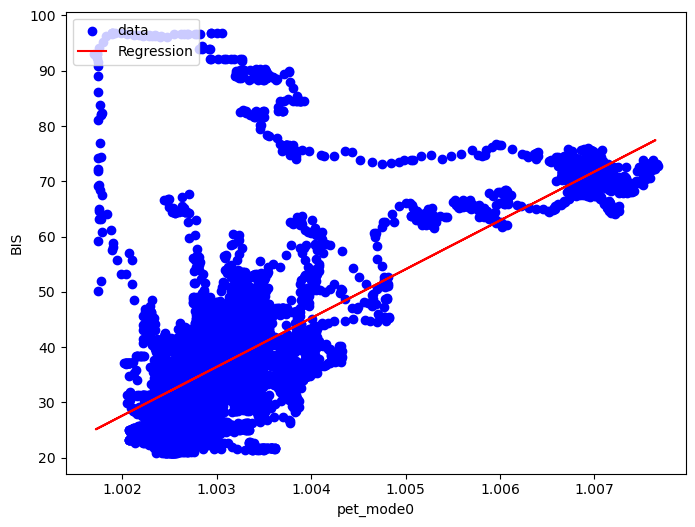

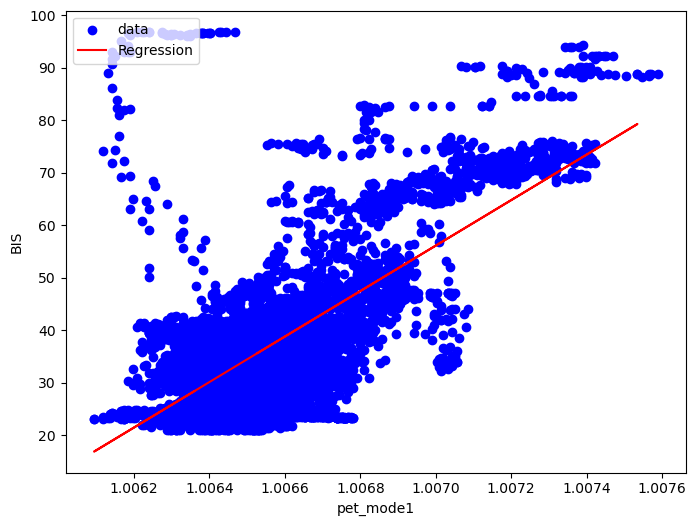

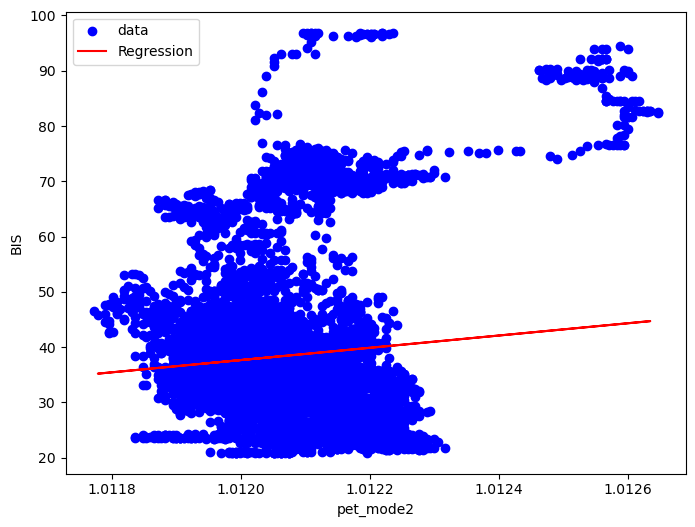

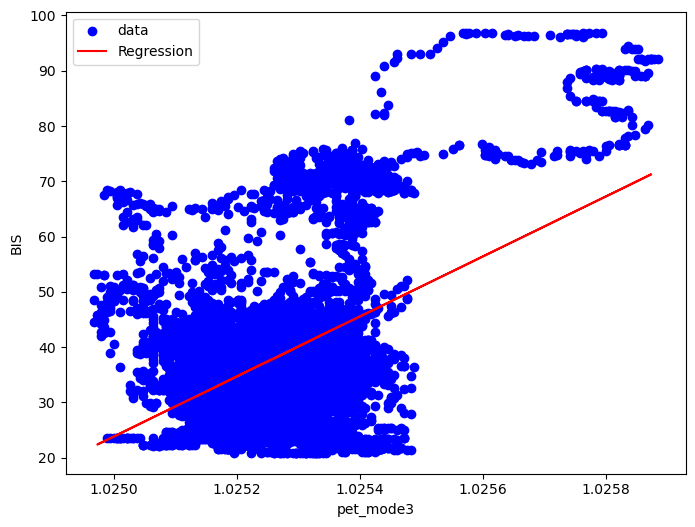

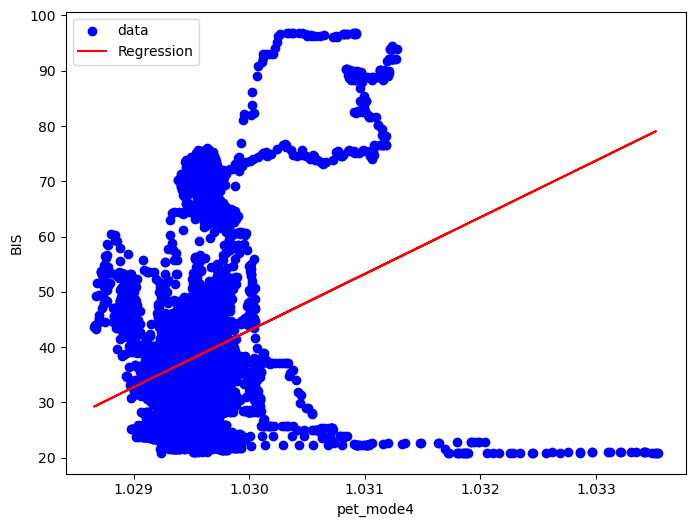

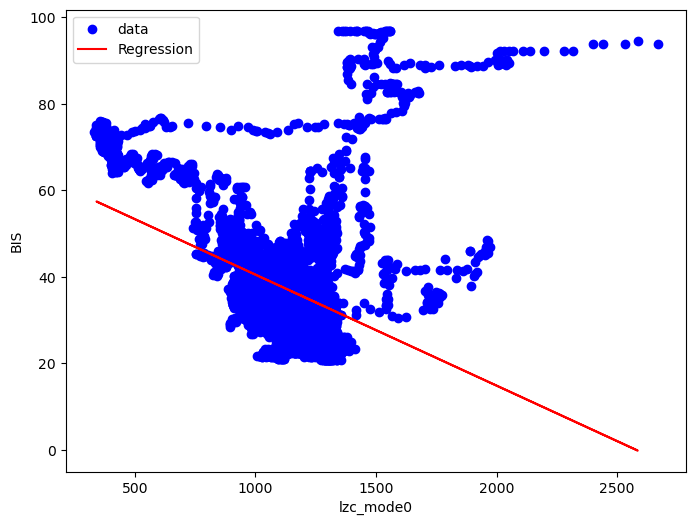

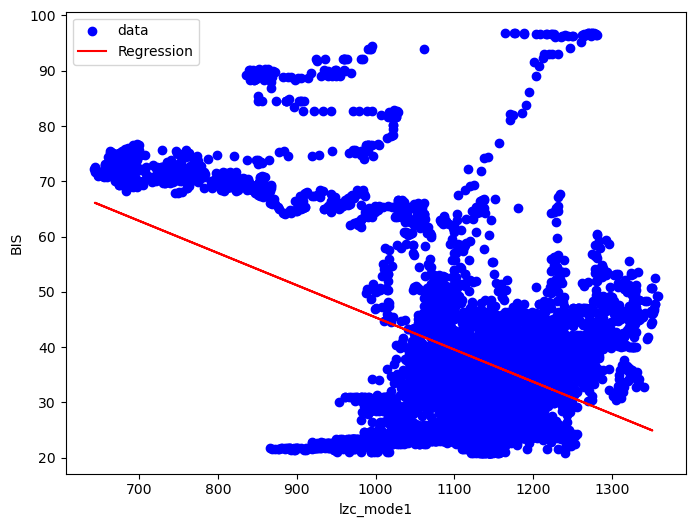

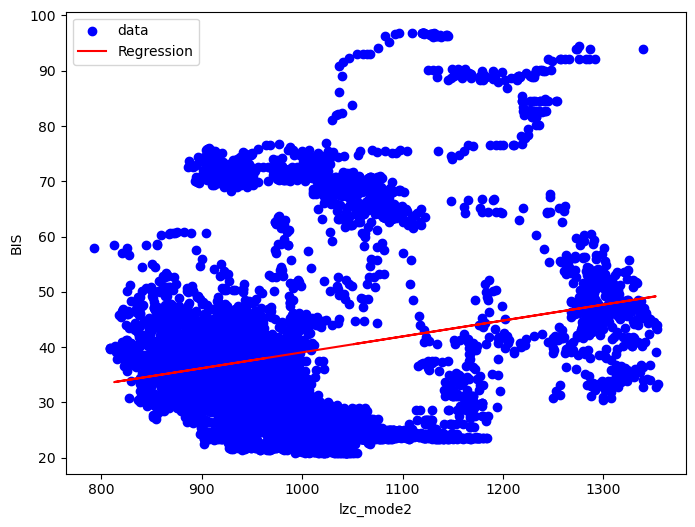

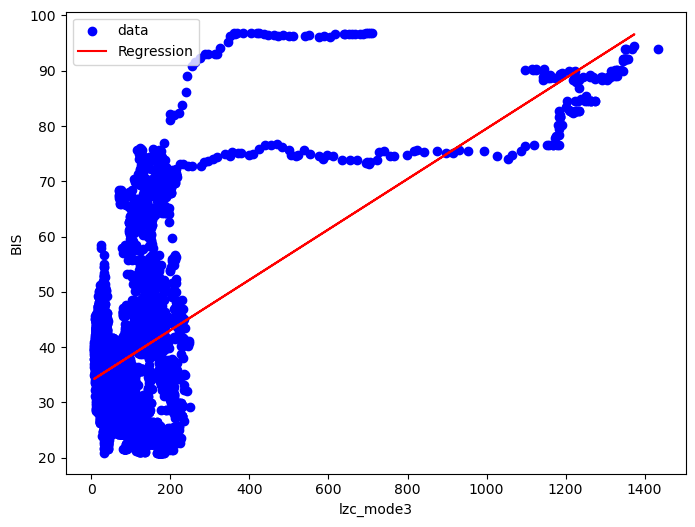

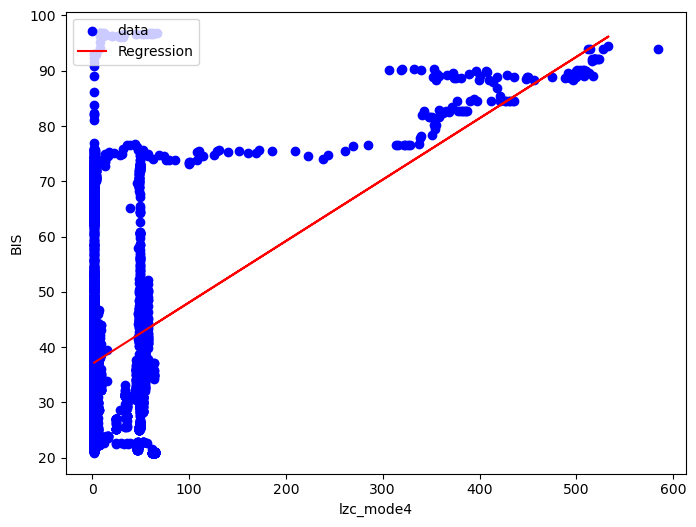

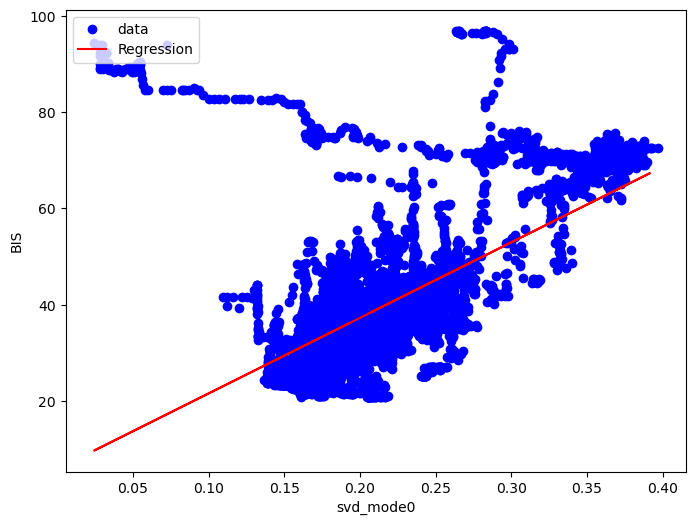

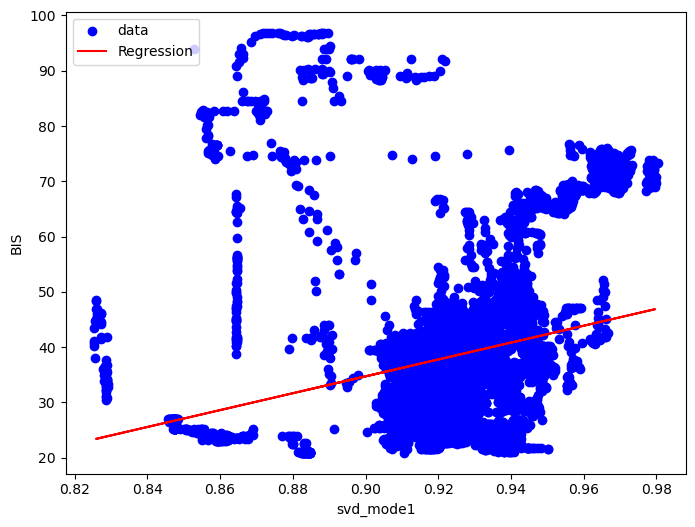

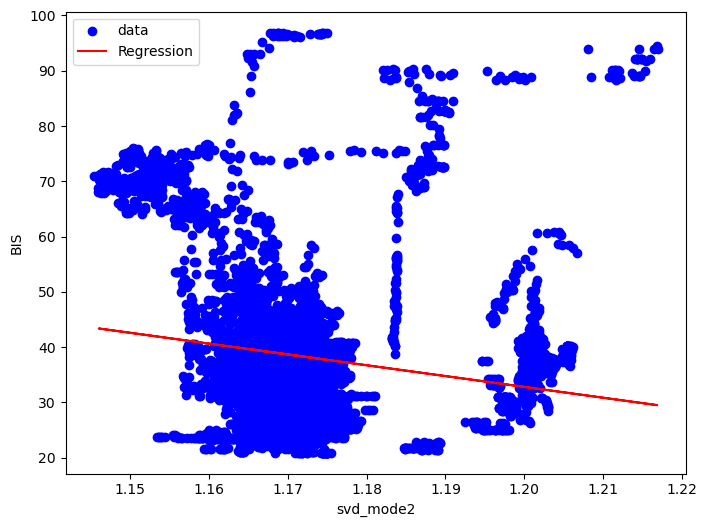

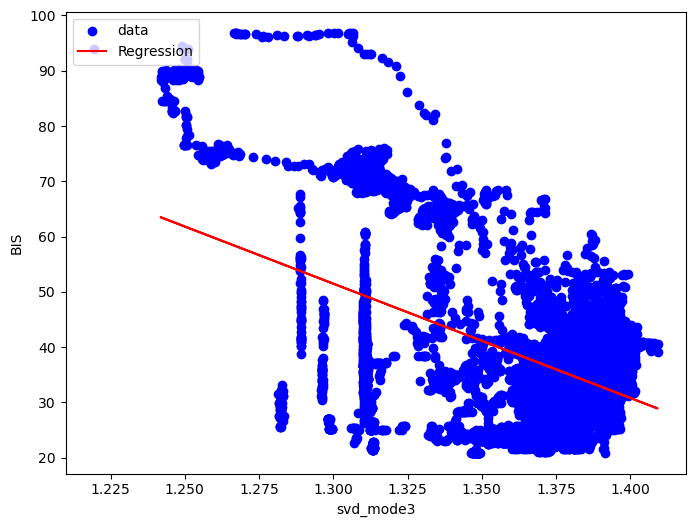

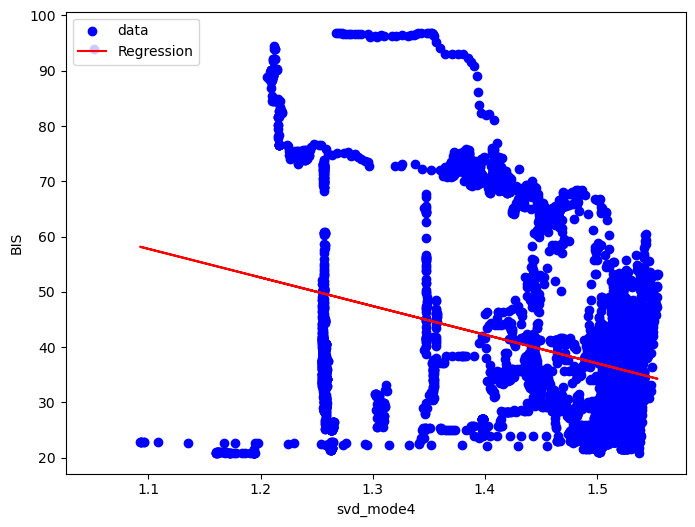

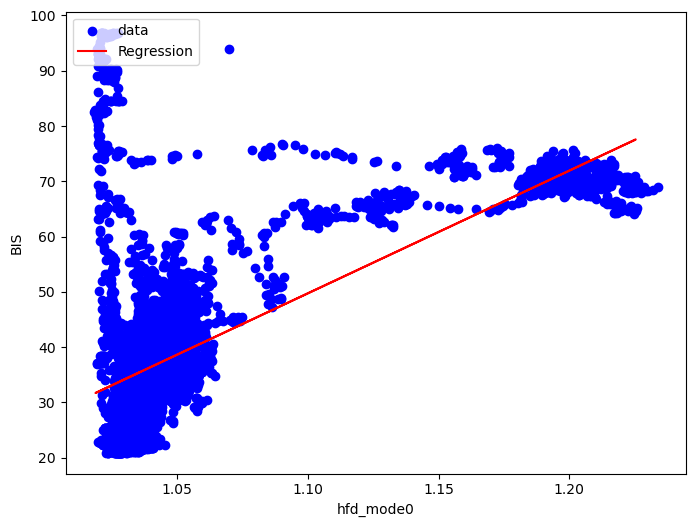

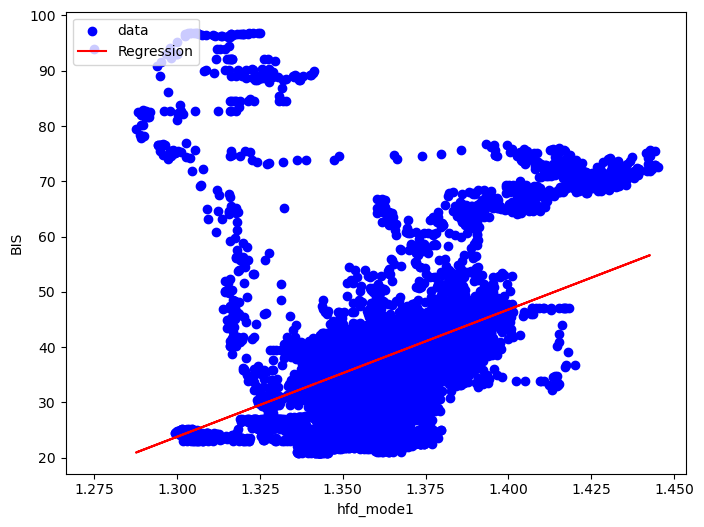

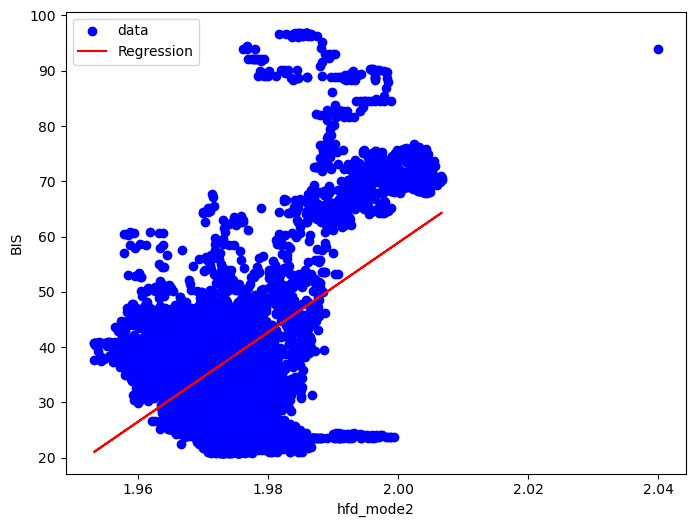

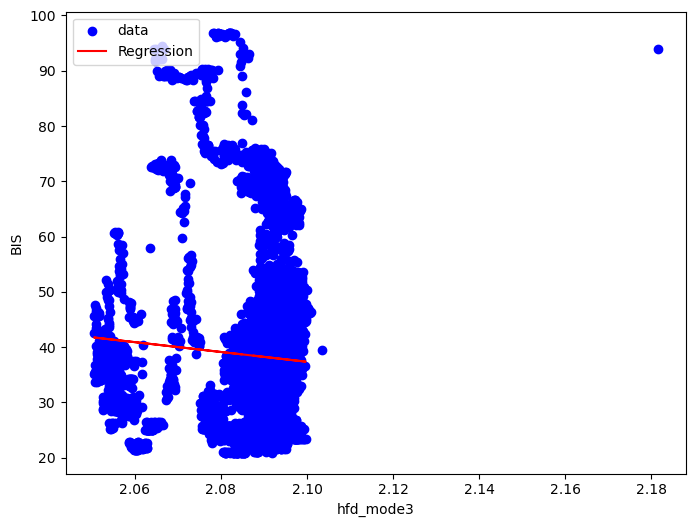

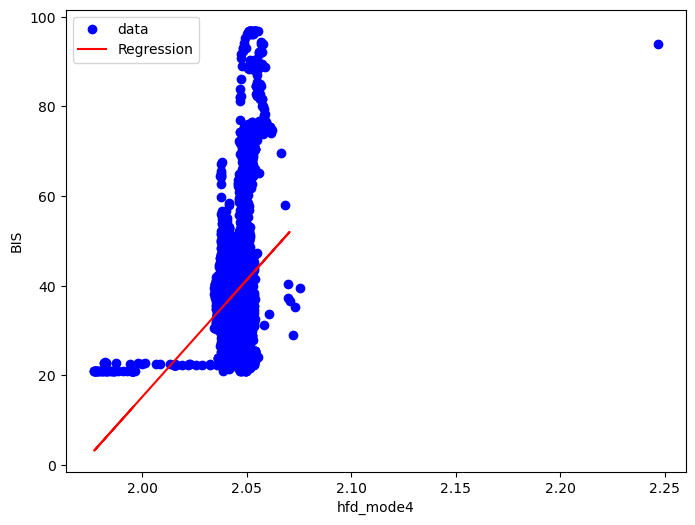

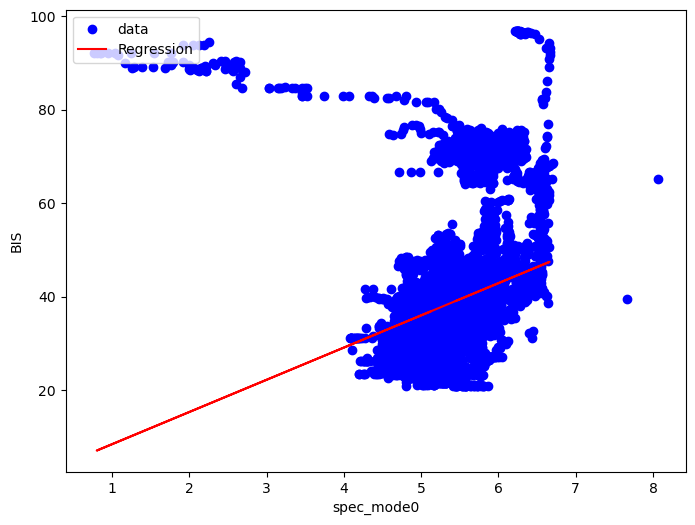

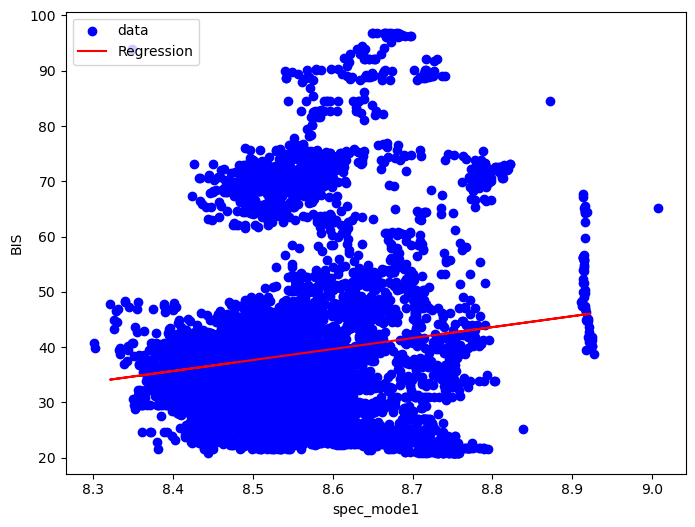

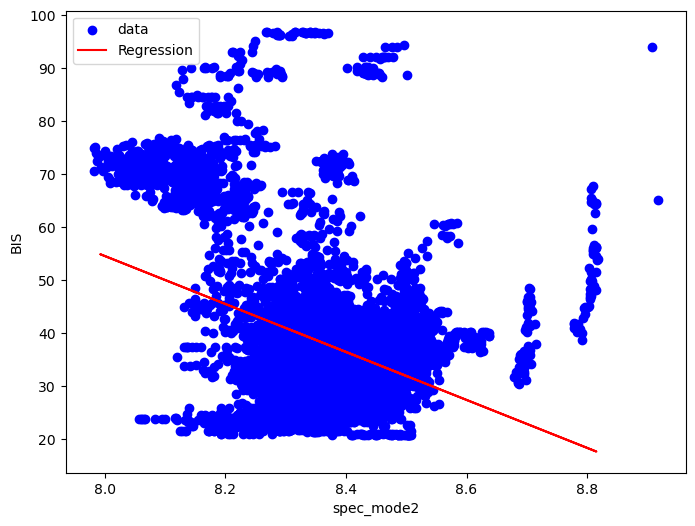

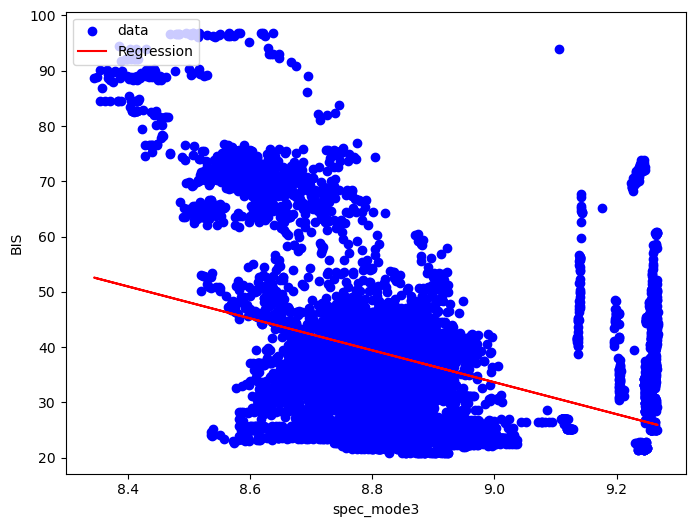

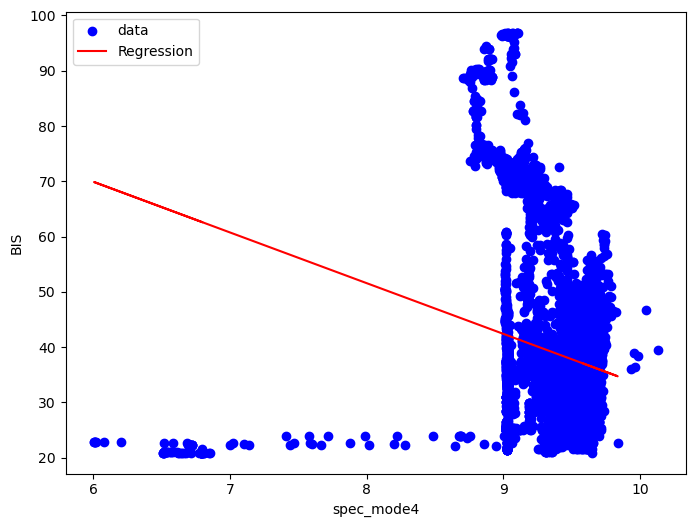

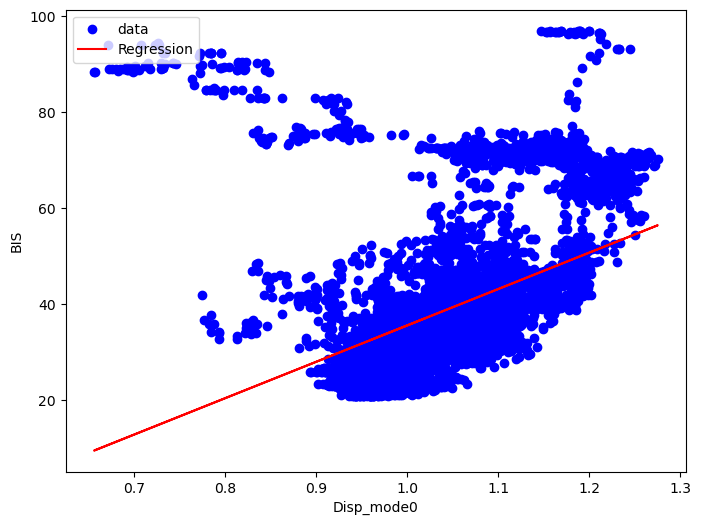

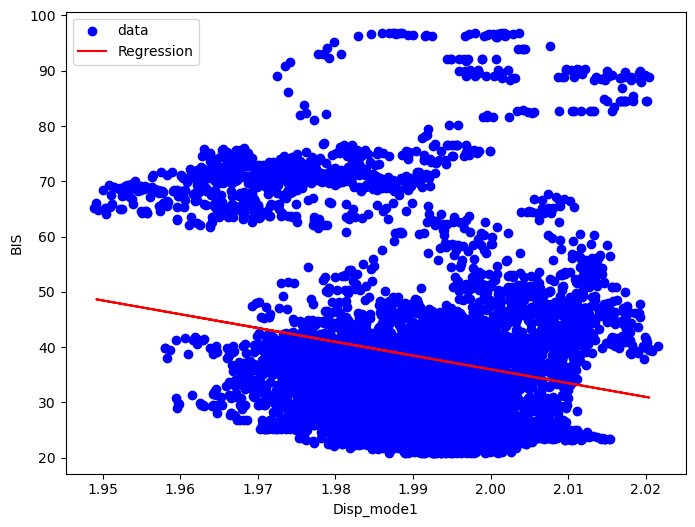

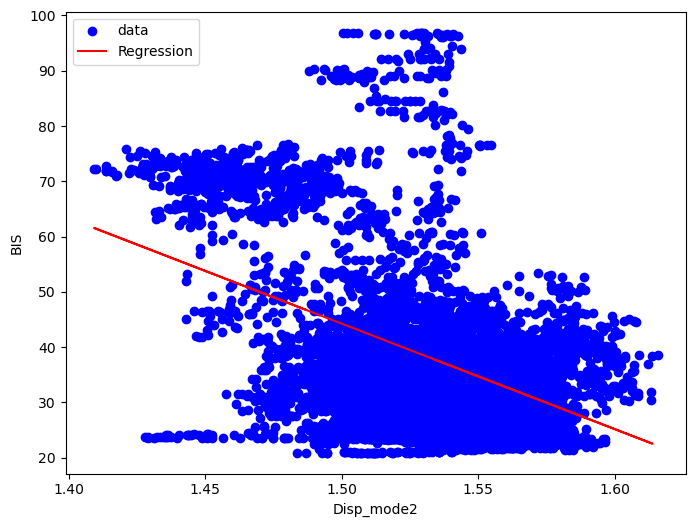

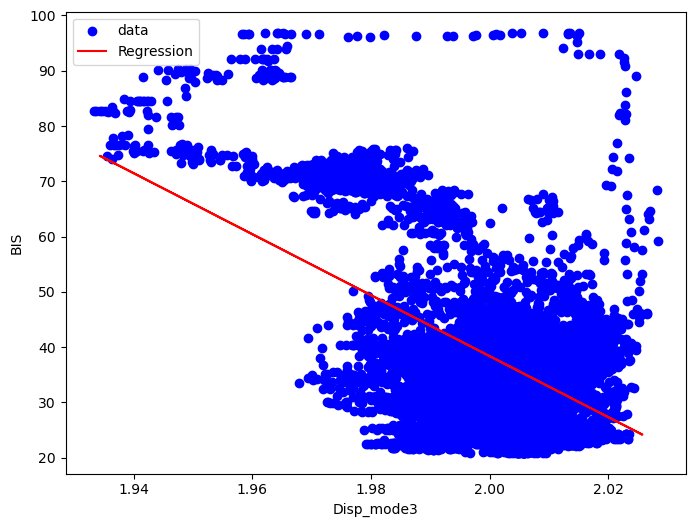

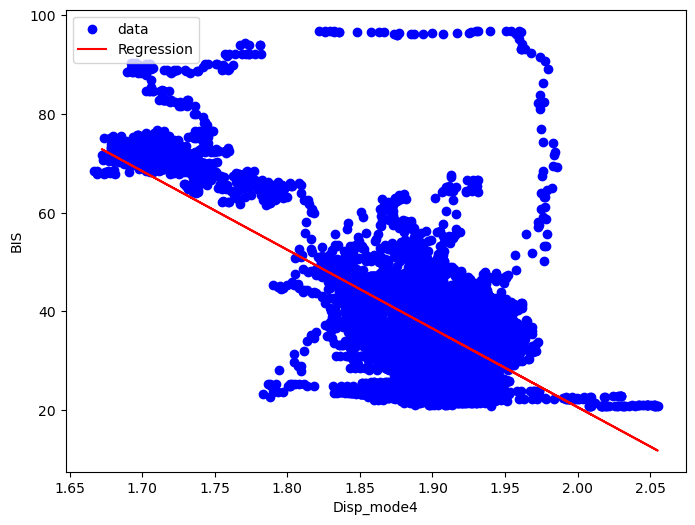

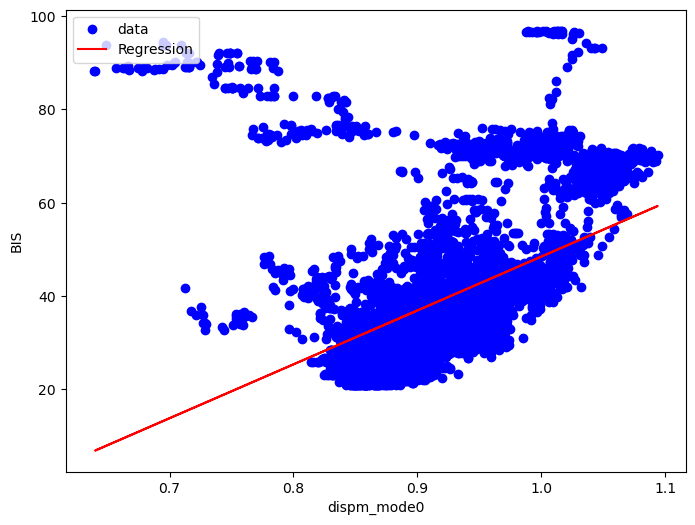

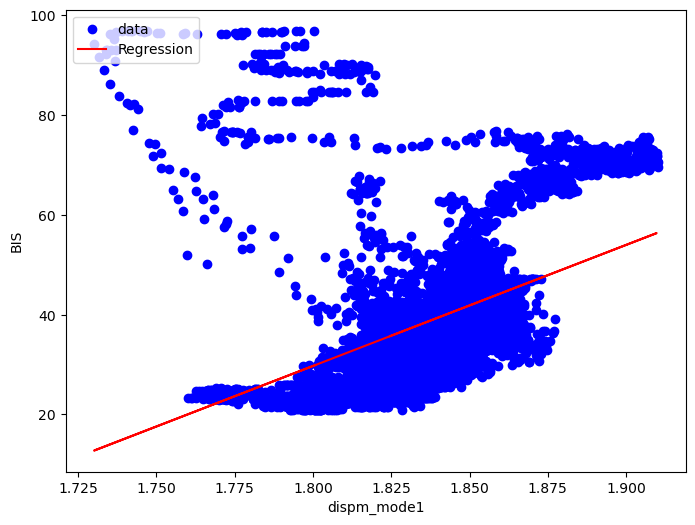

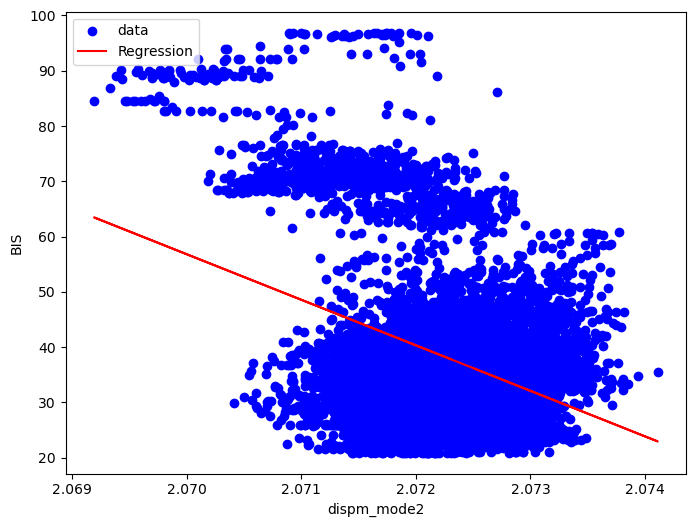

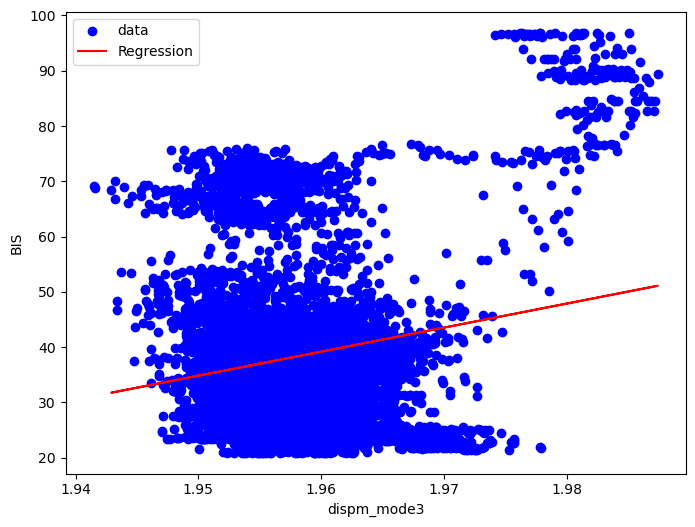

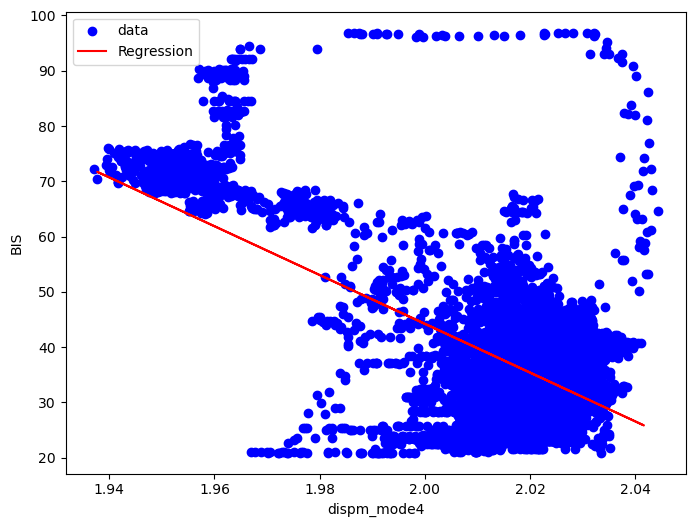

In [6]:

for column in patient.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
54,Disp_mode4_r2,47.953584
25,pet_mode0_r2,47.704075
20,Perment_mode0_r2,47.618597
26,pet_mode1_r2,46.690913
21,Perment_mode1_r2,46.061049
15,detf_mode0_r2,43.944799
59,dispm_mode4_r2,39.057396
40,hfd_mode0_r2,39.004074
0,hm_mode0_r2,33.939415
35,svd_mode0_r2,29.009717


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
54     Disp_mode4    0.580359
55    dispm_mode0    0.079788
5        hc_mode0    0.068650
50     Disp_mode0    0.030890
56    dispm_mode1    0.026707
45     spec_mode0    0.025896
33      lzc_mode3    0.022155
32      lzc_mode2    0.013686
6        hc_mode1    0.012699
15     detf_mode0    0.010656
9        hc_mode4    0.010103
14      kfd_mode4    0.007070
47     spec_mode2    0.005619
4        hm_mode4    0.005508
40      hfd_mode0    0.005424
0        hm_mode0    0.005310
21  Perment_mode1    0.004594
35      svd_mode0    0.003934
26      pet_mode1    0.003877
42      hfd_mode2    0.003861
3        hm_mode3    0.003653
24  Perment_mode4    0.003250
58    dispm_mode3    0.003154
2        hm_mode2    0.002943
49     spec_mode4    0.002927
22  Perment_mode2    0.002864
34      lzc_mode4    0.002827
38      svd_mode3    0.002780
31      lzc_mode1    0.002743
43      hfd_mode3    0.002539
39      svd_mode4    0.002398
48     spec_mode3    0.002311
19     det